In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [6]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\pizza_sales_excel_file.xlsx - pizza_sales.csv')
df.head(3)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza


In [13]:
df.shape
print('Number of rows=',df.shape [0]),
print('Number of rows=',df.shape [1])

Number of rows= 48620
Number of rows= 12


In [14]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [21]:
df['order_date']=pd.to_datetime(df['order_date'])
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [27]:
df.isnull().sum() 

pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [28]:
df.drop_duplicates()
df.head(2) 

,,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
pizza_id,order_id,,,,,,,,,,
1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


### EXPLORATORY ANALYSIS

### Top favourites

In [51]:
a=df.groupby(['pizza_name_id'],as_index=False)['pizza_name_id'].count().sort_values(by=['pizza_name_id'],ascending=False).head(10)
a

,pizza_name_id
3,1811
80,1365
20,1359
21,1273
18,1159
68,1088
28,1001
65,993
0,967
1,926


<Axes: xlabel='pizza_name_id', ylabel='pizza_name_id'>

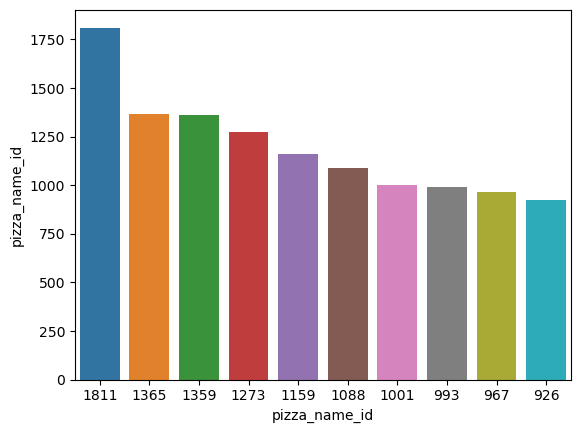

In [55]:
sns.barplot(x='pizza_name_id',y='pizza_name_id',data=a,order=a.sort_values('pizza_name_id',ascending=False).pizza_name_id)

### Profit gained

In [57]:
b=df.groupby(['total_price'],as_index=False)['total_price'].sum().sort_values(by=['total_price'],ascending=False).head(10)
b

,total_price
21,176063.75
11,70848.00
14,70534.25
3,65580.00
13,65505.00
19,60162.75
5,40975.00
20,40405.50
6,31683.75
17,24235.00


<Axes: xlabel='total_price', ylabel='total_price'>

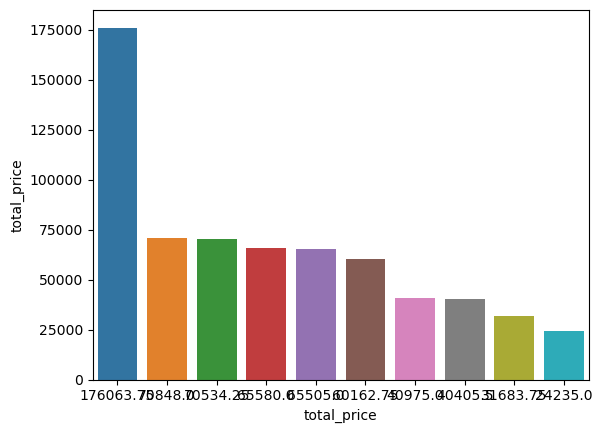

In [58]:
sns.barplot(x='total_price',y='total_price',data=b,order=b.sort_values('total_price',ascending=False).total_price)

### Top selling dates

In [59]:
c=df.groupby(['order_date'],as_index=False)['total_price'].sum().sort_values(by=['total_price'],ascending=False).head(10)
c

,order_date,total_price
324,2015-11-27,4422.45
323,2015-11-26,4405.95
283,2015-10-15,4320.20
184,2015-07-04,3864.20
183,2015-07-03,3443.00
134,2015-05-15,3386.15
204,2015-07-24,3204.40
271,2015-10-01,3202.15
31,2015-02-01,3189.20
303,2015-11-06,3157.50


<Axes: xlabel='order_date', ylabel='total_price'>

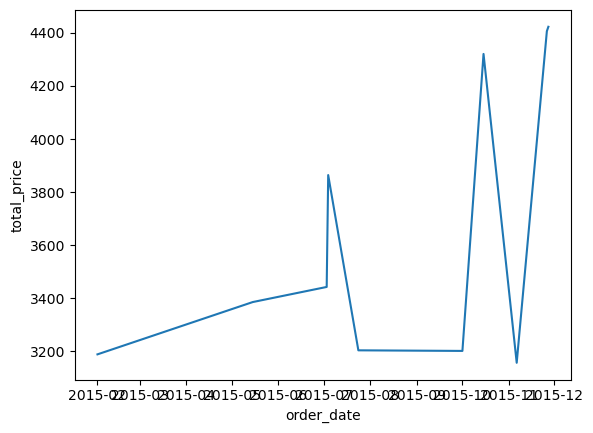

In [67]:
c_sorted = c.sort_values(by='order_date', ascending=True)

sns.lineplot(x='order_date', y='total_price', data=c_sorted)

### Top category

In [70]:
d=df.groupby(['pizza_name_id'],as_index=False)['pizza_category'].count().sort_values(by=['pizza_category'],ascending=False).head(10)
d

,pizza_name_id,pizza_category
3,big_meat_s,1811
80,thai_ckn_l,1365
20,five_cheese_l,1359
21,four_cheese_l,1273
18,classic_dlx_m,1159
68,spicy_ital_l,1088
28,hawaiian_s,1001
65,southw_ckn_l,993
0,bbq_ckn_l,967
1,bbq_ckn_m,926


### Top size

In [74]:
e=df.groupby(['pizza_size'],as_index=False)['pizza_name_id'].count().sort_values(by=['pizza_name_id'],ascending=False).head(10)
e

,pizza_size,pizza_name_id
0,L,18526
1,M,15385
2,S,14137
3,XL,544
4,XXL,28


<Axes: xlabel='pizza_size', ylabel='pizza_name_id'>

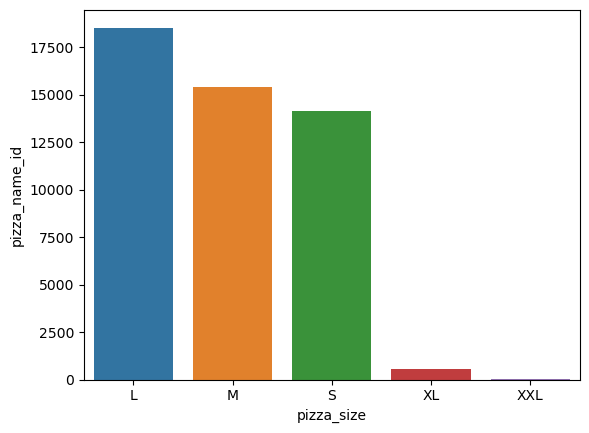

In [77]:
sns.barplot(x='pizza_size',y='pizza_name_id',data=e,order=e.sort_values('pizza_name_id',ascending=False).pizza_size)

In [78]:
f=df.groupby(['pizza_size'],as_index=False)['pizza_category'].count().sort_values(by=['pizza_category'],ascending=False).head(10)
f

,pizza_size,pizza_category
0,L,18526
1,M,15385
2,S,14137
3,XL,544
4,XXL,28


<Axes: xlabel='pizza_size', ylabel='pizza_category'>

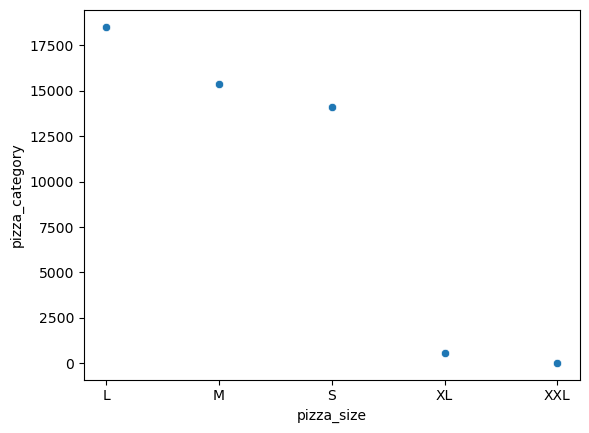

In [82]:
sns.scatterplot(x='pizza_size', y='pizza_category', data=f)

In [83]:
g=df.groupby(['pizza_category'],as_index=False)['total_price'].sum().sort_values(by=['total_price'],ascending=False).head(10)
g

,pizza_category,total_price
1,Classic,220053.10
2,Supreme,208197.00
0,Chicken,195919.50
3,Veggie,193690.45


In [84]:
h=df.groupby(['pizza_size'],as_index=False)['total_price'].sum().sort_values(by=['total_price'],ascending=False).head(10)
h

,pizza_size,total_price
0,L,375318.70
1,M,249382.25
2,S,178076.50
3,XL,14076.00
4,XXL,1006.60


## Key insights